In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Downloading newset data
Download newes dataset for Sars-Cov-2 in Poland

In [2]:
import CovidDataset as covid
dataset = covid.generateDataset()
dataset = dataset.set_index("Date")

Presenting recived data

In [3]:
dataset

,DayOfWeek,Country,Confirmed,Confirmed1,Confirmed2,Confirmed3,Confirmed4,Confirmed5,Confirmed6,Confirmed7,Recovered,Deaths
Date,,,,,,,,,,,,
2020-03-04,wednesday,Poland,1,0,0,0,0,0,0,0,0,0
2020-03-05,thursday,Poland,1,1,0,0,0,0,0,0,0,0
2020-03-06,friday,Poland,4,1,1,0,0,0,0,0,0,0
2020-03-07,saturday,Poland,0,4,1,1,0,0,0,0,0,0
2020-03-08,sunday,Poland,6,0,4,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,friday,Poland,24051,22683,25221,25454,21713,24785,27875,27086,267580,9499
2020-11-14,saturday,Poland,25571,24051,22683,25221,25454,21713,24785,27875,282215,10045
2020-11-15,sunday,Poland,21854,25571,24051,22683,25221,25454,21713,24785,294783,10348


In [4]:
dataset.describe()

,Confirmed,Confirmed1,Confirmed2,Confirmed3,Confirmed4,Confirmed5,Confirmed6,Confirmed7,Recovered,Deaths
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,2907.108108,2833.162162,2752.791506,2668.413127,2569.683398,2476.822394,2389.243243,2291.864865,43920.536680,1936.984556
std,6382.314919,6303.836666,6205.607426,6092.422883,5924.725619,5773.279573,5635.984122,5454.944837,58825.602398,2029.011005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,301.500000,300.500000,299.500000,298.500000,297.000000,295.000000,293.000000,288.500000,5023.000000,765.500000
50%,418.000000,416.000000,411.000000,407.000000,404.000000,401.000000,401.000000,400.000000,26635.000000,1568.000000
75%,810.000000,800.000000,781.000000,769.000000,765.000000,761.000000,758.000000,752.500000,60878.000000,2195.500000
max,27875.000000,27875.000000,27875.000000,27875.000000,27875.000000,27875.000000,27875.000000,27875.000000,324282.000000,10848.000000


Plots of relevant data from dataset

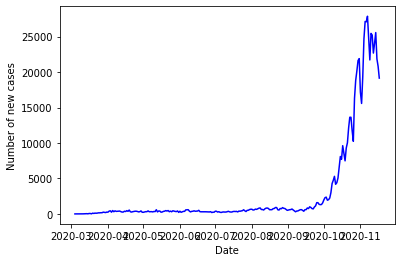

In [5]:

y = dataset["Confirmed"]
x = dataset.index
plt.plot_date(x, y,'b-')
plt.ylabel("Number of new cases")
plt.xlabel("Date")
plt.show()

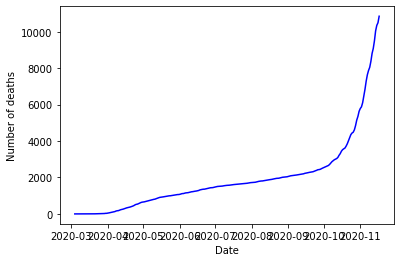

In [6]:
y = dataset["Deaths"]
x = dataset.index
plt.plot_date(x, y,'b-')
plt.ylabel("Number of deaths")
plt.xlabel("Date")
plt.show()

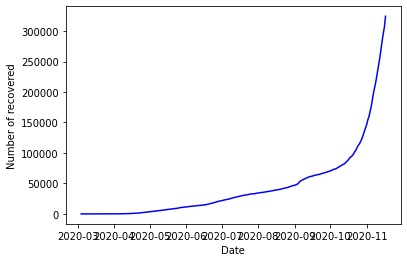

In [7]:
y = dataset["Recovered"]
x = dataset.index
plt.plot_date(x, y,'b-')
plt.ylabel("Number of recovered")
plt.xlabel("Date")
plt.show()

# Preprocessing dataset

## Adding new columns

## Boolean value about schools close during pandemic
At begining of pandemic schools were opens til 25 march 2020, and remain close until end of summer. Next ther we colsed once again 23 october 2020.

In [8]:
# Inserting new column into dataset
# schoolsAreClose [0-open;1-close]
schoolsAreClose = np.zeros(dataset.shape[0], dtype=int)
dataset.insert(dataset.shape[1], "SchoolsAreClose", schoolsAreClose)
dataset.loc['2020-03-25':'2020-08-31', "SchoolsAreClose"] = 1
dataset.loc['2020-10-23':, "SchoolsAreClose"] = 1

## Boolean value about lockdown during pandemic
At begining of pandemic there was full lockdown from 25 march 2020 to 20 april 2020

In [9]:
# lockdown [0-NoLockdown;1-Lockdown]
lockdown = np.zeros(dataset.shape[0], dtype=int)
dataset.insert(dataset.shape[1], "Lockdown", lockdown)
dataset.loc['2020-03-25':'2020-04-25', "Lockdown"] = 1

## Boolean value about mandatory face mask in publics
At begining of pandemic there was obligatory to cover mouth and nose from 16 april 2020 to 30 may 2020, and again from 24 october 2020


In [10]:
# masks [0-NoMaskObligatory;1-MaskObligatory]
masks = np.zeros(dataset.shape[0], dtype=int)
dataset.insert(dataset.shape[1], "MasksObligatory", masks)
dataset.loc['2020-04-16':'2020-05-30', "MasksObligatory"] = 1
dataset.loc['2020-10-24':, "MasksObligatory"] = 1

## Tests per each day


In [12]:
test_per_day= [92,179,0,299,230,246,394,210,655,1525,1079,0,2406,1616,1681,1876,2012,2523,2520,2771,3346,3320,4503,4607,4109,3824,4812,4382,5377,5760,5963,7856,4710,6748,7069,8313,10698,11265,8447,5623,4691,8172,12578,10583,13306,11286,9990,10119,14444,11920,14482,13793,11639,7226,12885,13783,13500,16601,11385,9935,7856,10466,16198,15526,17512,17180,16218,14312,16560,20346,26235,21919,25118,18855,15797,17178,21637,22369,22341,31368,16502,12135,22177,23021,21958,26724,25613,16477,15974,14435,21222,29427,18333,23344,18115,14404,17053,22056,19130,21944,18105,19654,13282,19109,25966,23852,26725,22723,21443,14193,21171,22441,25196,22287,22832,24031,5547,21866,25104,23183,27804,22663,19210,16294,20700,20209,23855,24203,35012,17969,15753,21904,25323,25497,26254,24546,19383,15464,20266,25511,27190,24280,26239,20300,18812,22691,29952,23064,35127,28385,23874,17783,25829,33647,28650,32676,21900,20374,14924,23142,24079,26131,26726,24632,16613,13158,20530,28741,25599,29689,25704,19634,16754,22211,28894,28283,25762,21871,19017,12474,29407,34167,15684,22493,25566,18619,10303,18818,23327,18680,18643,21154,14502,12631,18719,21912,22192,21023,20040,18988,12224,22599,22058,23725,24232,23290,18821,13467,23119,28021,29615,28724,30515,25976,18324,24036,44056,44113,30812,28228,31180,25078,33851,43852,64518,50825,48989,37289,36039,41578,59341,50200,62121,55352,53539,50407,66062,60607,67892,78041,59795,49971,65012,65792,69080,67120,82955,66814,61055,43456,54701,53274,57249,57552,56084,46607,35105,41983,55729]
dataset.insert(2, "Tests", test_per_day)

In [13]:
dataset

,DayOfWeek,Country,Tests,Confirmed,Confirmed1,Confirmed2,Confirmed3,Confirmed4,Confirmed5,Confirmed6,Confirmed7,Recovered,Deaths,SchoolsAreClose,Lockdown,MasksObligatory
Date,,,,,,,,,,,,,,,,
2020-03-04,wednesday,Poland,92,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-05,thursday,Poland,179,1,1,0,0,0,0,0,0,0,0,0,0,0
2020-03-06,friday,Poland,0,4,1,1,0,0,0,0,0,0,0,0,0,0
2020-03-07,saturday,Poland,299,0,4,1,1,0,0,0,0,0,0,0,0,0
2020-03-08,sunday,Poland,230,6,0,4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-13,friday,Poland,56084,24051,22683,25221,25454,21713,24785,27875,27086,267580,9499,1,0,1
2020-11-14,saturday,Poland,46607,25571,24051,22683,25221,25454,21713,24785,27875,282215,10045,1,0,1
2020-11-15,sunday,Poland,35105,21854,25571,24051,22683,25221,25454,21713,24785,294783,10348,1,0,1


In [15]:
dataset.to_csv("./covid_dataset_preprocessed.csv", sep=';', index=True)